In [94]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import pandas as pd
import seaborn as sns
import import_ipynb
from Election_Stock_Scraping import Trump_stock_abv,Harris_stock_abv #ensure same directory

In [95]:
import StockDataFetcher
from StockDataFetcher import StockDataFetcher #import data fetcher function

In [96]:
from Poly_Key import API_KEY #import api key

In [97]:
print(Trump_stock_abv)
print(Harris_stock_abv)

['LMT', 'XOM', 'CVX', 'CAT', 'VMC', 'BX', 'ABNB']
['QCLN', 'FSLR', 'DHI', 'KBH', 'LEN-B', 'LLY', 'MRK', 'HUM', 'UNH', 'NEE', 'PLUG', 'TSLA', 'RIVN', 'NVDA', 'PLTR', 'MSFT', 'ATT.L', 'JPM', 'GS']


In [98]:
fetcher = StockDataFetcher(API_KEY)

#Data for multiple stocks by each candidate
Trump_stock_data = fetcher.get_stock_data_for_tickers(Trump_stock_abv)
Harris_stock_data = fetcher.get_stock_data_for_tickers(Harris_stock_abv)

#Create a DataFrame from the fetched stock data with only closing amount
Trump_df = fetcher.create_dataframe(Trump_stock_data)
Harris_df = fetcher.create_dataframe(Harris_stock_data)



Fetching data for LMT...
Fetching data for XOM...
Fetching data for CVX...
Fetching data for CAT...
Fetching data for VMC...
Fetching data for BX...
Fetching data for ABNB...
Fetching data for QCLN...
Fetching data for FSLR...
Fetching data for DHI...
Fetching data for KBH...
Fetching data for LEN-B...
Fetching data for LLY...
Fetching data for MRK...
Fetching data for HUM...
Fetching data for UNH...
Fetching data for NEE...
Fetching data for PLUG...
Fetching data for TSLA...
Fetching data for RIVN...
Fetching data for NVDA...
Fetching data for PLTR...
Fetching data for MSFT...
Fetching data for ATT.L...
Fetching data for JPM...
Fetching data for GS...


In [99]:
Trump_df

,2024-11-05,2024-11-06,2024-11-07,2024-11-08,2024-11-11,2024-11-12,2024-11-13,2024-11-14,2024-11-15,2024-11-18,...,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,2024-12-16
ticker,,,,,,,,,,,,,,,,,,,,,
LMT,546.75,551.82,551.84,564.56,570.58,565.96,557.73,538.99,534.83,530.96,...,517.00,517.50,517.48,513.03,510.01,512.94,504.24,496.58,494.65,491.65
XOM,118.96,121.00,121.15,121.11,120.47,120.35,121.47,120.56,119.31,120.31,...,117.67,114.28,114.78,113.57,112.90,112.67,111.92,111.82,110.84,108.47
CVX,153.41,157.72,156.77,156.93,156.50,155.29,158.72,161.80,161.42,160.76,...,161.92,158.32,159.33,155.24,157.08,157.00,156.21,154.71,153.87,149.36
CAT,383.37,416.88,408.21,393.37,396.54,393.01,387.07,387.36,384.07,384.46,...,399.26,399.51,394.98,395.03,399.26,388.39,388.87,380.78,380.51,378.92
VMC,272.67,290.45,290.59,292.31,292.04,288.38,287.71,282.68,279.28,278.74,...,286.50,285.65,287.63,286.86,281.23,276.31,279.56,278.11,275.77,277.00
BX,169.62,176.38,176.30,177.46,183.16,180.66,181.56,181.21,181.41,183.01,...,186.17,185.50,187.20,187.00,185.35,189.57,192.41,190.30,188.42,188.46
ABNB,137.82,140.91,147.37,134.61,137.40,133.20,132.76,134.56,132.50,132.19,...,137.46,139.07,136.32,136.92,137.27,138.30,138.84,137.47,130.95,132.20


In [100]:
# Transpose the DataFrame so dates are on the x-axis
Trump_df_transposed = Trump_df.T

# Convert the index to datetime for proper plotting
Trump_df_transposed.index = pd.to_datetime(Trump_df_transposed.index)

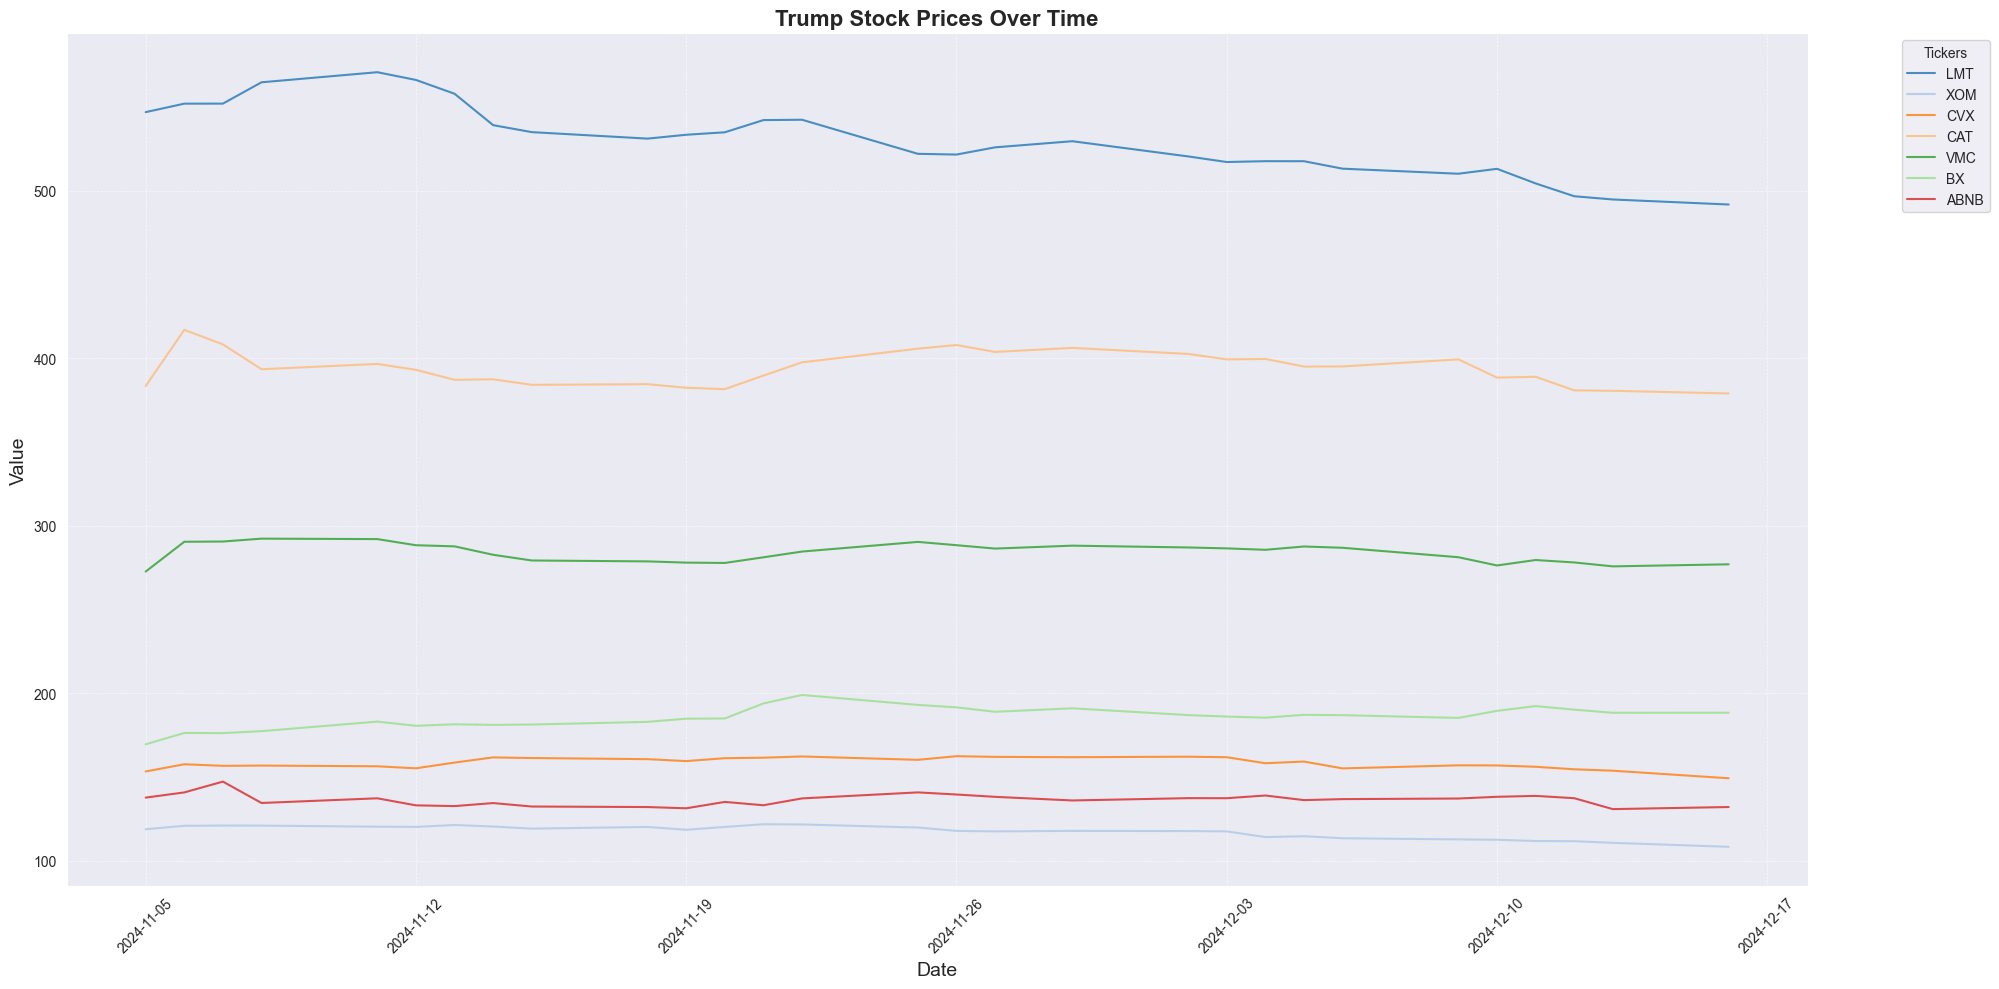

In [101]:
plt.figure(figsize=(20, 10))  # Adjust the size as needed for readability

# Use a colormap for better color distinction
color_palette = plt.colormaps['tab20']

# Plot each ticker with improved line settings
for idx, ticker in enumerate(Trump_df_transposed.columns):
    plt.plot(Trump_df_transposed.index,
             Trump_df_transposed[ticker],
             label=ticker,
             color=color_palette(idx),  # Assign colors dynamically
             linewidth=1.5,             # Thicker lines for visibility
             alpha=0.8)                 # Reduce opacity for overlapping clarity

# Add grid lines for better visual alignment
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Trump Stock Prices Over Time', fontsize=16, weight='bold')

# Rotate x-axis ticks for readability and limit their number
plt.xticks(rotation=45)

# Adjust the x-tick locator for better date formatting
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set weekly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Place the legend outside the plot for a cleaner view
plt.legend(title='Tickers', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()

In [102]:
Harris_df

,2024-11-05,2024-11-06,2024-11-07,2024-11-08,2024-11-11,2024-11-12,2024-11-13,2024-11-14,2024-11-15,2024-11-18,...,2024-12-03,2024-12-04,2024-12-05,2024-12-06,2024-12-09,2024-12-10,2024-12-11,2024-12-12,2024-12-13,2024-12-16
ticker,,,,,,,,,,,,,,,,,,,,,
QCLN,34.85,33.86,33.96,34.09,34.77,33.38,33.56,33.07,32.71,33.32,...,35.51,35.02,34.86,35.48,36.41,35.74,36.22,35.87,36.09,36.44
FSLR,215.89,194.02,196.70,193.93,193.83,182.26,182.13,195.14,190.45,195.56,...,207.51,201.57,197.93,194.19,200.00,202.92,201.00,196.32,199.67,190.53
DHI,173.27,166.71,168.11,168.79,167.46,161.83,161.13,163.74,161.61,161.45,...,166.93,161.35,159.68,158.51,160.96,157.00,153.68,151.21,149.87,147.61
KBH,82.02,79.91,80.40,82.20,82.79,79.17,78.41,78.53,78.53,77.28,...,82.74,79.69,78.37,78.53,79.47,77.20,74.31,73.53,71.42,71.28
LLY,806.06,776.38,797.45,831.54,832.44,818.86,811.81,786.23,746.20,727.20,...,813.33,829.84,825.62,826.71,803.58,799.58,796.03,782.35,789.12,779.00
MRK,101.65,100.73,101.17,102.92,100.73,98.58,98.50,98.36,96.31,96.56,...,101.85,101.37,103.55,103.09,103.79,101.00,99.75,101.25,102.00,100.06
HUM,260.60,288.51,287.76,288.12,282.44,280.06,289.42,283.14,275.67,271.35,...,291.13,288.08,283.06,281.73,286.24,285.82,278.20,272.78,274.12,260.46
UNH,567.03,596.69,605.45,615.81,625.25,614.67,605.87,593.15,592.23,589.65,...,605.23,610.79,578.97,549.62,560.62,565.19,533.53,515.76,520.48,498.50
NEE,78.65,74.52,74.62,76.97,75.91,74.26,74.24,75.28,76.35,76.39,...,76.29,75.74,76.20,75.24,74.70,74.14,73.98,73.22,73.62,72.79


In [105]:
# Transpose the DataFrame so dates are on the x-axis
Harris_df_transposed = Harris_df.T

# Convert the index to datetime for proper plotting
Harris_df_transposed.index = pd.to_datetime(Harris_df_transposed.index)

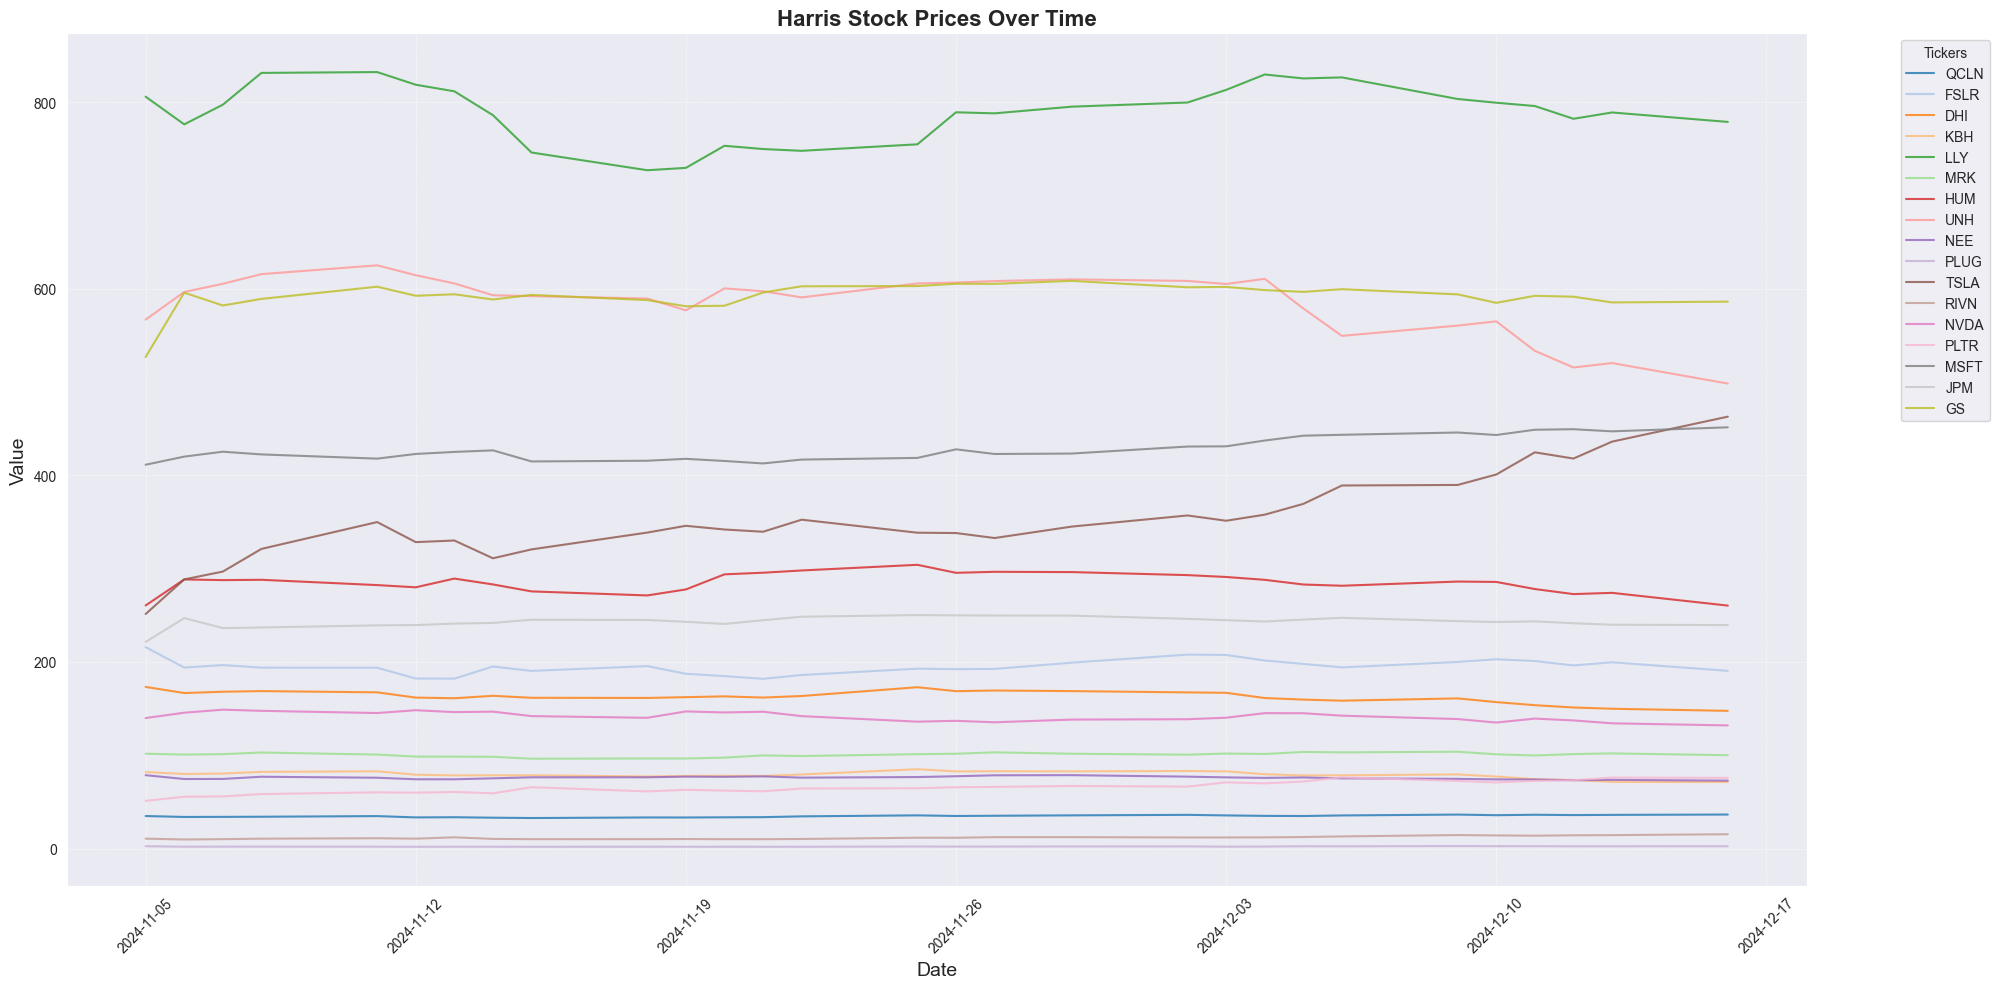

In [104]:
plt.figure(figsize=(20, 10))  # Adjust the size as needed for readability

# Use a colormap for better color distinction
color_palette = plt.colormaps['tab20']

# Plot each ticker with improved line settings
for idx, ticker in enumerate(Harris_df_transposed.columns):
    plt.plot(Harris_df_transposed.index,
             Harris_df_transposed[ticker],
             label=ticker,
             color=color_palette(idx),  # Assign colors dynamically
             linewidth=1.5,             # Thicker lines for visibility
             alpha=0.8)                 # Reduce opacity for overlapping clarity

# Add grid lines
plt.grid(visible=True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Add labels and title with improved font size
plt.xlabel('Date', fontsize=14)
plt.ylabel('Value', fontsize=14)
plt.title('Harris Stock Prices Over Time', fontsize=16, weight='bold')

# Rotate x-axis ticks for readability and limit their number
plt.xticks(rotation=45)

# Adjust the x-tick locator for better date formatting
plt.gca().xaxis.set_major_locator(mdates.WeekdayLocator(interval=1))  # Set weekly intervals
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))

# Place the legend outside the plot for a cleaner view
plt.legend(title='Tickers', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

plt.tight_layout()
plt.show()